## TPC-DS BigQuery Import  
Import data from GCS to a previously created BigQuery dataset

In [1]:
import config, schema, bq, load

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows", 1000)

### II. Create Dataset for Upload

In [5]:
dataset_name = 'ds_1GB_qual'

In [6]:
bq.create_dataset(dataset_name=dataset_name)

Dataset(DatasetReference('tpc-benchmarking-9432', 'ds_1GB_qual'))

### III. Create GCP BQ Schema to Upload TO

In [7]:
bq.create_schema(schema_file=config.fp_schema + config.sep + "bq_ds_1GB_qual.ddl",
                 dataset="ds_1GB_qual")

In [8]:
# set n to about 5, high numbers run afoul of BQ's upload limits
# i.e. 403 - rateLimitExceeded
# https://cloud.google.com/bigquery/docs/error-messages
u = load.BQPooledUpload(dataset_name=dataset_name,
                        test="ds", scale=1, n=5)
u.verbose = True

### IV. Upload from GCS to BQ

In [9]:
results = u.pipeline()

Starting job 2f18d2a6-d974-4ed3-9672-3807deb5e5e7
Starting job d41c038b-913a-427d-99b1-ca6b83c221bf
Starting job 8c231f33-9c3a-4bd0-9710-c7781e3f9dc4
Starting job 7f6b8644-521d-4a4d-816d-83166753ebb9
Starting job 0019ccd1-4275-465c-935e-24e627cd367d
Job finished.
Loading: ds_1GB_household_demographics_1_12.dat
t0: 2020-04-18 21:52:06.027787
t1: 2020-04-18 21:52:08.599556
Done: True
------------------------------
Job finished.
Loading: ds_1GB_call_center_1_12.dat
t0: 2020-04-18 21:52:06.025587
t1: 2020-04-18 21:52:08.951182
Done: True
------------------------------
Starting job 80a3477d-23c5-4bf8-a75c-080294e66a76
Job finished.
Loading: ds_1GB_store_1_12.dat
t0: 2020-04-18 21:52:06.030299
t1: 2020-04-18 21:52:09.300605
Done: True
------------------------------
Starting job 62472fb7-e343-44fd-835e-26e67b018885
Starting job 4b89dd05-d009-4ee4-a0e6-c488158a7077
Job finished.
Loading: ds_1GB_customer_demographics_2_12.dat
t0: 2020-04-18 21:52:06.026467
t1: 2020-04-18 21:52:10.979271
Done: T

In [10]:
a = list(results)
a

[None, None, None, None, None]

In [11]:
dfx = pd.concat(u.up_data)
dfx.sort_index(inplace=True)

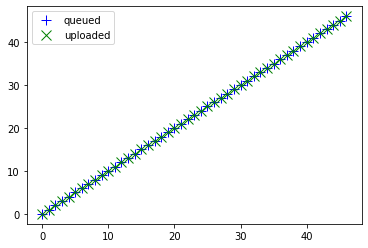

In [12]:
plt.plot(u.df.index, '+',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='blue', label="queued");
plt.plot(dfx.index, 'x',
         markersize=10, 
         markerfacecolor=None,
         markeredgecolor='green', label="uploaded");
plt.legend();

In [13]:
dfx

,chunk_name,url,size_bytes,uri,test,scale,table,n,t0,t1,done,file_n,dt,dt_s,size_megabytes,size_gigabytes,MB/s,GB/s
0,ds_1GB_call_center_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,1885,gs://tpc-benchmark-5947/ds_1GB_call_center_1_1...,ds,1GB,call_center,1,2020-04-18 21:52:08.953287,2020-04-18 21:52:11.769450,True,0,00:00:02.816163,2.816163,0.001798,1.885000e-06,0.000638,6.693505e-07
1,ds_1GB_catalog_page_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,1620074,gs://tpc-benchmark-5947/ds_1GB_catalog_page_1_...,ds,1GB,catalog_page,1,2020-04-18 21:52:11.771345,2020-04-18 21:52:15.170639,True,1,00:00:03.399294,3.399294,1.545023,1.620074e-03,0.454513,4.765913e-04
2,ds_1GB_catalog_returns_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,21234304,gs://tpc-benchmark-5947/ds_1GB_catalog_returns...,ds,1GB,catalog_returns,1,2020-04-18 21:52:15.172475,2020-04-18 21:52:25.941468,True,2,00:00:10.768993,10.768993,20.250610,2.123430e-02,1.880455,1.971800e-03
3,ds_1GB_catalog_sales_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,294468836,gs://tpc-benchmark-5947/ds_1GB_catalog_sales_1...,ds,1GB,catalog_sales,1,2020-04-18 21:52:25.943920,2020-04-18 21:53:28.752185,True,3,00:01:02.808265,62.808265,280.827366,2.944688e-01,4.471185,4.688377e-03
4,ds_1GB_customer_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,13109372,gs://tpc-benchmark-5947/ds_1GB_customer_1_12.dat,ds,1GB,customer,1,2020-04-18 21:53:28.754516,2020-04-18 21:53:35.526572,True,4,00:00:06.772056,6.772056,12.502071,1.310937e-02,1.846126,1.935804e-03
5,ds_1GB_customer_address_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,5452165,gs://tpc-benchmark-5947/ds_1GB_customer_addres...,ds,1GB,customer_address,1,2020-04-18 21:53:35.529317,2020-04-18 21:53:41.376400,True,5,00:00:05.847083,5.847083,5.199590,5.452165e-03,0.889262,9.324590e-04
6,ds_1GB_customer_demographics_10_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6658276,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,10,2020-04-18 21:53:41.377002,2020-04-18 21:53:47.159215,True,6,00:00:05.782213,5.782213,6.349827,6.658276e-03,1.098165,1.151510e-03
7,ds_1GB_customer_demographics_11_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6650896,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,11,2020-04-18 21:53:47.161282,2020-04-18 21:53:56.767040,True,7,00:00:09.605758,9.605758,6.342789,6.650896e-03,0.660311,6.923864e-04
8,ds_1GB_customer_demographics_12_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6657550,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,12,2020-04-18 21:53:56.770803,2020-04-18 21:54:02.531772,True,8,00:00:05.760969,5.760969,6.349134,6.657550e-03,1.102095,1.155630e-03
9,ds_1GB_customer_demographics_1_12.dat,https://storage.googleapis.com/tpc-benchmark-5...,6381073,gs://tpc-benchmark-5947/ds_1GB_customer_demogr...,ds,1GB,customer_demographics,1,2020-04-18 21:54:02.533897,2020-04-18 21:54:12.692725,True,9,00:00:10.158828,10.158828,6.085465,6.381073e-03,0.599032,6.281308e-04
